# 1 矩阵运算

## 1.1 创建一个 4*4 的单位矩阵

In [1]:
# 这个项目设计来帮你熟悉 python list 和线性代数
# 你不能调用任何python库，包括NumPy，来完成作业

A = [[1,2,3], 
     [2,3,3], 
     [1,2,5]]

B = [[1,2,3,5], 
     [2,3,3,5], 
     [1,2,5,1]]

#TODO 创建一个 4*4 单位矩阵
I = [[1,0,0,0],
     [0,1,0,0],
     [0,0,1,0],
     [0,0,0,1]]

## 1.2 返回矩阵的行数和列数

In [2]:
# TODO 返回矩阵的行数和列数
def shape(M):
    return len(M),len(M[0])

## 1.3 每个元素四舍五入到特定小数数位

In [3]:
# TODO 每个元素四舍五入到特定小数数位
# 直接修改参数矩阵，无返回值
def matxRound(M, decPts=4):
    r, c = shape(M)
    for i in xrange(r):
        for j in xrange(c):
            M[i][j] = round(M[i][j], decPts)

## 1.4 计算矩阵的转置

In [4]:
# TODO 计算矩阵的转置
def transpose(M):
    return [list(col) for col in zip(*M)]

## 1.5 计算矩阵乘法 AB

In [5]:
# TODO 计算矩阵乘法 AB，如果无法相乘则返回None
def matxMultiply(A, B):
    row_a, col_a = shape(A)
    row_b, col_b = shape(B)
    
    if col_a != row_b:
        return None
    
    M = [[0] * col_b for i in xrange(row_a)]
    
    for i in xrange(row_a):
        for j in xrange(col_b):
            M[i][j] = sum([A[i][k] * B[k][j] for k in xrange(col_a)])
    
    return M

## 1.6 测试你的函数是否实现正确

**提示：** 你可以用`from pprint import pprint`来更漂亮的打印数据，详见[用法示例](http://cn-static.udacity.com/mlnd/images/pprint.png)和[文档说明](https://docs.python.org/2/library/pprint.html#pprint.pprint)。

In [6]:
import pprint
pp = pprint.PrettyPrinter(indent=1,width=20)

#TODO 测试1.2 返回矩阵的行和列
pp.pprint(B)
print(shape(B))

print('-----------------------------')
#TODO 测试1.3 每个元素四舍五入到特定小数数位
c = [[1.0001, 2.000002, 3.000003, 4.04040404, 5.55555555, 6.1616161616]]
matxRound(c)
pp.pprint(c)

print('-----------------------------')
#TODO 测试1.4 计算矩阵的转置
b = transpose(B)
pp.pprint(b)
bb = transpose(b)
pp.pprint(bb)

print('-----------------------------')
#TODO 测试1.5 计算矩阵乘法AB，AB无法相乘
p = matxMultiply(A, b)
pp.pprint(p)

print('-----------------------------')
#TODO 测试1.5 计算矩阵乘法AB，AB可以相乘
p = matxMultiply(A, B)
pp.pprint(p)

[[1, 2, 3, 5],
 [2, 3, 3, 5],
 [1, 2, 5, 1]]
(3, 4)
-----------------------------
[[1.0001,
  2.0,
  3.0,
  4.0404,
  5.5556,
  6.1616]]
-----------------------------
[[1, 2, 1],
 [2, 3, 2],
 [3, 3, 5],
 [5, 5, 1]]
[[1, 2, 3, 5],
 [2, 3, 3, 5],
 [1, 2, 5, 1]]
-----------------------------
None
-----------------------------
[[8, 14, 24, 18],
 [11, 19, 30, 28],
 [10, 18, 34, 20]]


# 2 Gaussign Jordan 消元法

## 2.1 构造增广矩阵

$ A = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n}\\
    a_{21}    & a_{22} & ... & a_{2n}\\
    a_{31}    & a_{22} & ... & a_{3n}\\
    ...    & ... & ... & ...\\
    a_{n1}    & a_{n2} & ... & a_{nn}\\
\end{bmatrix} , b = \begin{bmatrix}
    b_{1}  \\
    b_{2}  \\
    b_{3}  \\
    ...    \\
    b_{n}  \\
\end{bmatrix}$

返回 $ Ab = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n} & b_{1}\\
    a_{21}    & a_{22} & ... & a_{2n} & b_{2}\\
    a_{31}    & a_{22} & ... & a_{3n} & b_{3}\\
    ...    & ... & ... & ...& ...\\
    a_{n1}    & a_{n2} & ... & a_{nn} & b_{n} \end{bmatrix}$

In [7]:
# TODO 构造增广矩阵，假设A，b行数相同
def augmentMatrix(A, b):
    return [ra + rb for ra,rb in zip(A,b)]

## 2.2 初等行变换
- 交换两行
- 把某行乘以一个非零常数
- 把某行加上另一行的若干倍：

In [8]:
# TODO r1 <---> r2
# 直接修改参数矩阵，无返回值
def swapRows(M, r1, r2):
    M[r1], M[r2] = M[r2], M[r1]

# TODO r1 <--- r1 * scale， scale!=0
# 直接修改参数矩阵，无返回值
def scaleRow(M, r, scale):
    if scale == 0:
        raise ValueError
    for i,v in enumerate(M[r]):
        M[r][i] = v * scale

# TODO r1 <--- r1 + r2*scale
# 直接修改参数矩阵，无返回值
def addScaledRow(M, r1, r2, scale):
    if scale == 0:
        return
    for i in xrange(len(M[r1])):
        M[r1][i] = M[r1][i] +  M[r2][i]*scale

## 2.3  Gaussian Jordan 消元法求解 Ax = b

### 提示：

步骤1 检查A，b是否行数相同

步骤2 构造增广矩阵Ab

步骤3 逐列转换Ab为化简行阶梯形矩阵 [中文维基链接](https://zh.wikipedia.org/wiki/%E9%98%B6%E6%A2%AF%E5%BD%A2%E7%9F%A9%E9%98%B5#.E5.8C.96.E7.AE.80.E5.90.8E.E7.9A.84-.7Bzh-hans:.E8.A1.8C.3B_zh-hant:.E5.88.97.3B.7D-.E9.98.B6.E6.A2.AF.E5.BD.A2.E7.9F.A9.E9.98.B5)
    
    对于Ab的每一列（最后一列除外）
        当前列为列c
        寻找列c中 对角线以及对角线以下所有元素（行 c~N）的绝对值的最大值
        如果绝对值最大值为0
            那么A为奇异矩阵，返回None （请在问题2.4中证明该命题）
        否则
            使用第一个行变换，将绝对值最大值所在行交换到对角线元素所在行（行c） 
            使用第二个行变换，将列c的对角线元素缩放为1
            多次使用第三个行变换，将列c的其他元素消为0
            
步骤4 返回Ab的最后一列

### 注：
我们并没有按照常规方法先把矩阵转化为行阶梯形矩阵，再转换为化简行阶梯形矩阵，而是一步到位。如果你熟悉常规方法的话，可以思考一下两者的等价性。

In [9]:
# TODO 实现 Gaussain Jordan 方法求解 Ax = b

""" Gaussian Jordan 方法求解 Ax = b.
    参数
        A: 方阵 
        b: 列向量
        decPts: 四舍五入位数，默认为4
        epsilon: 判读是否为0的阈值，默认 1.0e-16
        
    返回列向量 x 使得 Ax = b 
    返回None，如果 A，b 高度不同
    返回None，如果 A 为奇异矩阵
"""

def gj_Solve(A, b, decPts=4, epsilon = 1.0e-16):
    rows, cols = shape(A)

    # 非方阵
    if rows != cols:
        return None

    AM = augmentMatrix(A, b)
    for c in xrange(cols):
        # find max abs
        max_abs_row = c
        max_abs = abs(AM[c][c])
        for i in xrange(c+1, rows):
            if abs(AM[i][c]) > max_abs:
                max_abs = abs(AM[i][c])
                max_abs_row = i
        # max abs 为0，是奇异矩阵，返回None
        if (max_abs - 0) <= epsilon:
            return None
        swapRows(AM, max_abs_row, c)

        # scale to 1
        scaleRow(AM, c, 1./AM[c][c])

        # clear other rows
        for i in xrange(rows):
            if i == c:
                continue
            addScaledRow(AM, i, c, -AM[i][c])   
    
    matxRound(AM, decPts)

    return [[AM[i][cols]] for i in xrange(rows)]


## 2.4 证明下面的命题：

**如果方阵 A 可以被分为4个部分: ** 

$ A = \begin{bmatrix}
    I    & X \\
    Z    & Y \\
\end{bmatrix} , \text{其中 I 为单位矩阵，Z 为全0矩阵，Y 的第一列全0}$，

**那么A为奇异矩阵。**

提示：从多种角度都可以完成证明
- 考虑矩阵 Y 和 矩阵 A 的秩
- 考虑矩阵 Y 和 矩阵 A 的行列式
- 考虑矩阵 A 的某一列是其他列的线性组合

TODO 请使用 latex （请参照题目的 latex 写法学习）

TODO 证明：

因为I是单位矩阵,Z为全0矩阵，则可以通过变换把Y变为0矩阵

由于Y有一列全为0，则 A矩阵有一列全为0，行列式为0

即
$$
\det{\begin{vmatrix}A\end{vmatrix}} = 0 \text{,所以A为奇异矩阵}
$$

## 2.5 测试 gj_Solve() 实现是否正确

In [10]:
def matxLossMean(A, B):
    row_a, col_a = shape(A)
    row_b, col_b = shape(B)
    if (row_a, col_a) != (row_b, col_b):
        return None

    loss = 0.
    for i in xrange(row_a):
        for j in xrange(col_a):
            loss += (A[i][j] - B[i][j]) ** 2
    
    return loss / (row_a*col_a)

import pprint
pp = pprint.PrettyPrinter(indent=1,width=20)

# TODO 构造 矩阵A，列向量b，其中 A 为奇异矩阵
A = [[1,2,3],
        [0,0,5],
        [0,0,1]]
b = [[4],
        [5],
        [6]]
x = gj_Solve(A, b)
print 'singular matrix passed?', x == None

# TODO 构造 矩阵A，列向量b，其中 A 为非奇异矩阵
A = [[5.262, 2.739, -9.878],
        [5.111, 6.358, 7.638],
        [2.016, -9.924, -1.367]]
b = [[-3.441],
        [-2.152],
        [-9.278]]

# TODO 求解 x 使得 Ax = b
x = gj_Solve(A, b)
print 'x='
pp.pprint(x)

# TODO 计算 Ax
Ax = matxMultiply(A, x)
print 'Ax='
pp.pprint(Ax)

# TODO 比较 Ax 与 b
print 'Ax == b?', matxLossMean(Ax, b) <= 1.0e-6

singular matrix passed? True
x=
[[-1.1772],
 [0.7072],
 [-0.0827]]
Ax=
[[-3.4404949999999994],
 [-2.1519542],
 [-9.2784371]]
Ax == b? True


# 3 线性回归: 

## 3.1 计算损失函数相对于参数的导数 (两个3.1 选做其一)

我们定义损失函数 E ：
$$
E = \sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

证明：
$$
\frac{\partial E}{\partial m} = \sum_{i=1}^{n}{-2x_i(y_i - mx_i - b)}
$$

$$
\frac{\partial E}{\partial b} = \sum_{i=1}^{n}{-2(y_i - mx_i - b)}
$$

$$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix} = 2X^TXh - 2X^TY
$$

$$ 
\text{其中 }
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
$$

TODO 请使用 latex （参照题目的 latex写法学习）

TODO 证明：

根据链式法则  
$$
\begin{split}
\frac{\partial E}{\partial m} &= \sum_{i=1}^{n}{2(y_i - mx_i - b) (-x_i)}\\
&=\sum_{i=1}^{n}{-2x_i(y_i - mx_i - b)}\end{split}
$$

$$
\begin{split}
\frac{\partial E}{\partial b} &= \sum_{i=1}^{n}{2(y_i - mx_i - b) (-1)}\\
&=\sum_{i=1}^{n}{-2(y_i - mx_i - b)}\end{split}
$$

$$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix} =
\begin{bmatrix}
    \sum_{i=1}^{n}{-2x_i(y_i - mx_i - b)} \\
    \sum_{i=1}^{n}{-2(y_i - mx_i - b)}
\end{bmatrix}
$$

$$
\begin{split}
2X^TXh - 2X^TY =
2\begin{bmatrix}
    \sum_{i=1}^{n}(x_i)^2  & \sum_{i=1}^{n}x_i \\
    \sum_{i=1}^{n}x_i    &  1
\end{bmatrix}\begin{bmatrix}
    m\\
    b
\end{bmatrix} - 2\begin{bmatrix}
    \sum_{i=1}^{n}x_iy_i\\
    \sum_{i=1}^{n}y_i
\end{bmatrix}\\
= 2\begin{bmatrix}
    \sum_{i=1}^{n}(mx_i^2  + bx_i) \\
    \sum_{i=1}^{n}mx_i    +  b
\end{bmatrix} - 2\begin{bmatrix}
    \sum_{i=1}^{n}x_iy_i\\
    \sum_{i=1}^{n}y_i
\end{bmatrix}\\
= \begin{bmatrix}
    \sum_{i=1}^{n}{-2x_i(y_i - mx_i - b)} \\
    \sum_{i=1}^{n}{-2(y_i - mx_i - b)}
\end{bmatrix}\\
= \begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix}
\end{split}
$$

## 3.1 计算损失函数相对于参数的导数（两个3.1 选做其一）

证明：

$$
E = Y^TY -2(Xh)^TY + (Xh)^TXh
$$ 

$$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix}  = \frac{\partial E}{\partial h} = 2X^TXh - 2X^TY
$$

$$ 
\text{其中 }
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
$$

TODO 请使用 latex （请参照题目的 latex 写法学习）

TODO 证明：

## 3.2  线性回归

### 求解方程 $X^TXh = X^TY $, 计算线性回归的最佳参数 h

In [11]:
# TODO 实现线性回归
'''
参数：(x,y) 二元组列表
返回：m，b
'''
def linearRegression(points):
    # XTXh=XTY
    X = []
    Y = []
    for x,y in points:
        X.append([x, 1.])
        Y.append([y])
    h = gj_Solve(matxMultiply(transpose(X), X), matxMultiply(transpose(X), Y))
    if h is None:
        return 0,0
    else:
        return h[0][0], h[1][0]

## 3.3 测试你的线性回归实现

linearRegression(coef, intercept): (3.9974, 3.0832)


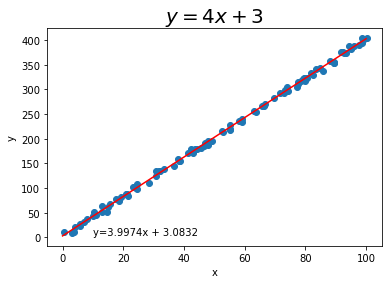

In [15]:
# TODO 构造线性函数
def f(x):
    """$y = 4x + 3$"""
    return (4*x + 3)

# TODO 构造 100 个线性函数上的点，加上适当的高斯噪音
import random
points = []
gauss_sigma = 1
for i in xrange(100):
    x = random.randint(0, 100)
    points.append((x+random.gauss(0, gauss_sigma), f(x)+random.gauss(0, gauss_sigma)))


#TODO 对这100个点进行线性回归，将线性回归得到的函数和原线性函数比较
h = linearRegression(points)
print "linearRegression(coef, intercept):", h

import matplotlib.pyplot as plt
import numpy as np
px = np.arange(0.0, 100.0, 0.01)
py = f(px)
plt.title(f.__doc__, fontsize=20)
plt.scatter([i[0] for i in points], [i[1] for i in points])
plt.plot(px, py, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.text(10, 5, 'y={}x + {}'.format(h[0], h[1]))
plt.show()


## 4.1 单元测试

请确保你的实现通过了以下所有单元测试。

In [13]:
import unittest
import numpy as np

from decimal import *

class LinearRegressionTestCase(unittest.TestCase):
    """Test for linear regression project"""

    def test_shape(self):

        for _ in range(10):
            r,c = np.random.randint(low=1,high=25,size=2)
            matrix = np.random.randint(low=-10,high=10,size=(r,c))
            self.assertEqual(shape(matrix.tolist()),(r,c))


    def test_matxRound(self):

        for decpts in range(10):
            r,c = np.random.randint(low=1,high=25,size=2)
            matrix = np.random.random((r,c))

            mat = matrix.tolist()
            dec_true = [[Decimal(str(round(num,decpts))) for num in row] for row in mat]

            matxRound(mat,decpts)
            dec_test = [[Decimal(str(num)) for num in row] for row in mat]

            res = Decimal('0')
            for i in range(len(mat)):
                for j in range(len(mat[0])):
                    res += dec_test[i][j].compare_total(dec_true[i][j])

            self.assertEqual(res,Decimal('0'))


    def test_transpose(self):
        for _ in range(10):
            r,c = np.random.randint(low=1,high=25,size=2)
            matrix = np.random.random((r,c))

            mat = matrix.tolist()
            t = np.array(transpose(mat))

            self.assertEqual(t.shape,(c,r))
            self.assertTrue((matrix.T == t).all())


    def test_matxMultiply(self):

        for _ in range(10):
            r,d,c = np.random.randint(low=1,high=25,size=3)
            mat1 = np.random.randint(low=-10,high=10,size=(r,d)) 
            mat2 = np.random.randint(low=-5,high=5,size=(d,c)) 
            dotProduct = np.dot(mat1,mat2)

            dp = np.array(matxMultiply(mat1,mat2))

            self.assertTrue((dotProduct == dp).all())


    def test_augmentMatrix(self):

        for _ in range(10):
            r,c = np.random.randint(low=1,high=25,size=2)
            A = np.random.randint(low=-10,high=10,size=(r,c))
            b = np.random.randint(low=-10,high=10,size=(r,1))

            Ab = np.array(augmentMatrix(A.tolist(),b.tolist()))
            ab = np.hstack((A,b))

            self.assertTrue((Ab == ab).all())

    def test_swapRows(self):
        for _ in range(10):
            r,c = np.random.randint(low=1,high=25,size=2)
            matrix = np.random.random((r,c))

            mat = matrix.tolist()

            r1, r2 = np.random.randint(0,r, size = 2)
            swapRows(mat,r1,r2)

            matrix[[r1,r2]] = matrix[[r2,r1]]

            self.assertTrue((matrix == np.array(mat)).all())

    def test_scaleRow(self):

        for _ in range(10):
            r,c = np.random.randint(low=1,high=25,size=2)
            matrix = np.random.random((r,c))

            mat = matrix.tolist()

            rr = np.random.randint(0,r)
            with self.assertRaises(ValueError):
                scaleRow(mat,rr,0)

            scale = np.random.randint(low=1,high=10)
            scaleRow(mat,rr,scale)
            matrix[rr] *= scale

            self.assertTrue((matrix == np.array(mat)).all())
    
    def test_addScaleRow(self):

        for _ in range(10):
            r,c = np.random.randint(low=1,high=25,size=2)
            matrix = np.random.random((r,c))

            mat = matrix.tolist()

            r1,r2 = np.random.randint(0,r,size=2)

            scale = np.random.randint(low=1,high=10)
            addScaledRow(mat,r1,r2,scale)
            matrix[r1] += scale * matrix[r2]

            self.assertTrue((matrix == np.array(mat)).all())


    def test_gj_Solve(self):

        for _ in range(10):
            r = np.random.randint(low=3,high=10)
            A = np.random.randint(low=-10,high=10,size=(r,r))
            b = np.arange(r).reshape((r,1))

            x = gj_Solve(A.tolist(),b.tolist())
            if np.linalg.matrix_rank(A) < r:
                self.assertEqual(x,None)
            else:
                # Ax = matxMultiply(A.tolist(),x)
                Ax = np.dot(A,np.array(x))
                loss = np.mean((Ax - b)**2)
                # print Ax
                # print loss
                self.assertTrue(loss<0.1)


suite = unittest.TestLoader().loadTestsFromTestCase(LinearRegressionTestCase)
unittest.TextTestRunner(verbosity=3).run(suite)

test_addScaleRow (__main__.LinearRegressionTestCase) ... ok
test_augmentMatrix (__main__.LinearRegressionTestCase) ... ok
test_gj_Solve (__main__.LinearRegressionTestCase) ... ok
test_matxMultiply (__main__.LinearRegressionTestCase) ... ok
test_matxRound (__main__.LinearRegressionTestCase) ... ok
test_scaleRow (__main__.LinearRegressionTestCase) ... ok
test_shape (__main__.LinearRegressionTestCase) ... ok
test_swapRows (__main__.LinearRegressionTestCase) ... ok
test_transpose (__main__.LinearRegressionTestCase) ... ok

----------------------------------------------------------------------
Ran 9 tests in 0.135s

OK


<unittest.runner.TextTestResult run=9 errors=0 failures=0>